In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('Input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(paths)

2800

In [5]:
paths[:5]

['Input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'Input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'Input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'Input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'Input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [6]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [7]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,Input\TESS Toronto emotional speech set data\O...,angry
1,Input\TESS Toronto emotional speech set data\O...,angry
2,Input\TESS Toronto emotional speech set data\O...,angry
3,Input\TESS Toronto emotional speech set data\O...,angry
4,Input\TESS Toronto emotional speech set data\O...,angry


In [8]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

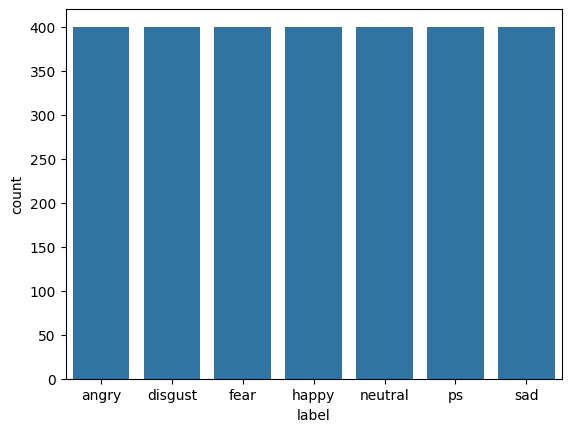

In [9]:
sns.countplot(data=df, x='label')

In [17]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(8,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(9,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

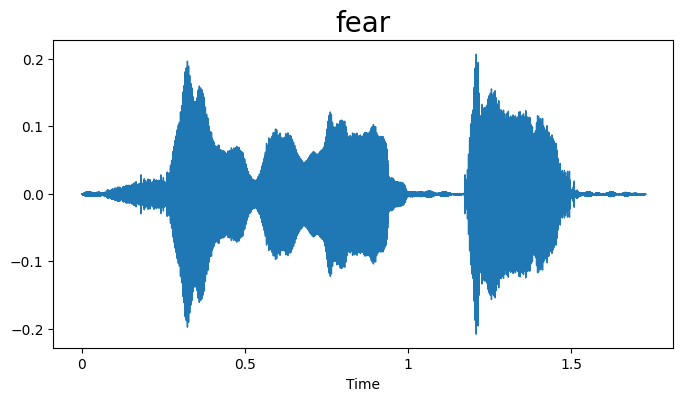

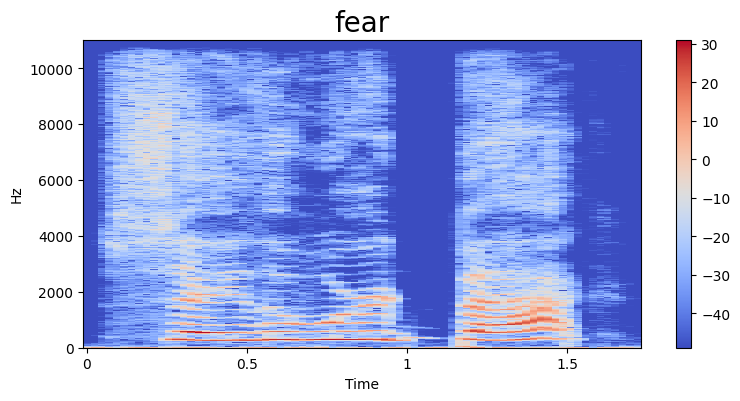

In [18]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

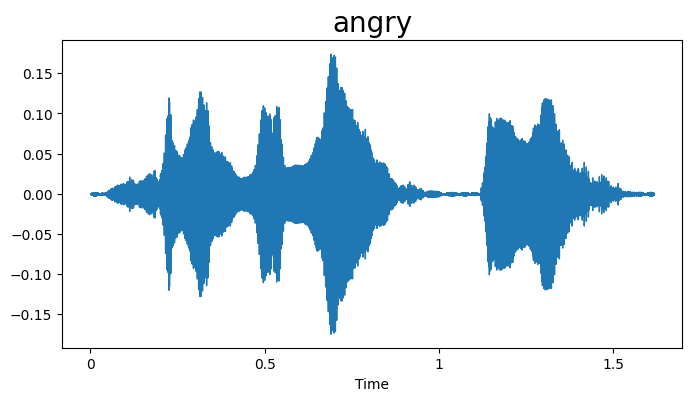

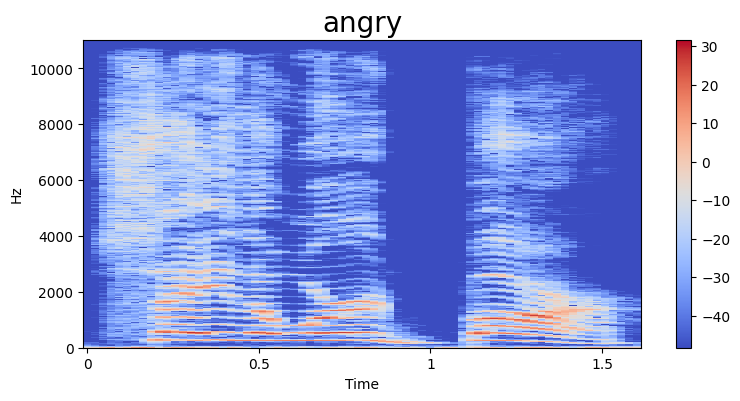

In [19]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

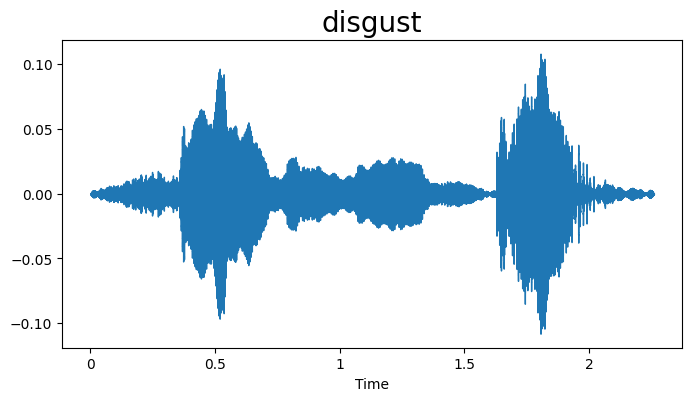

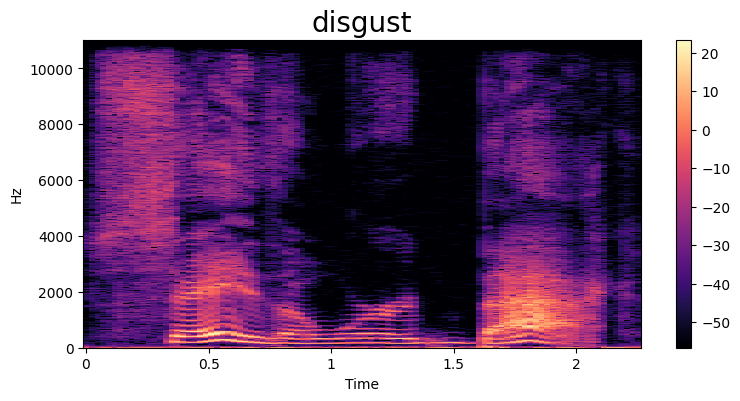

In [20]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

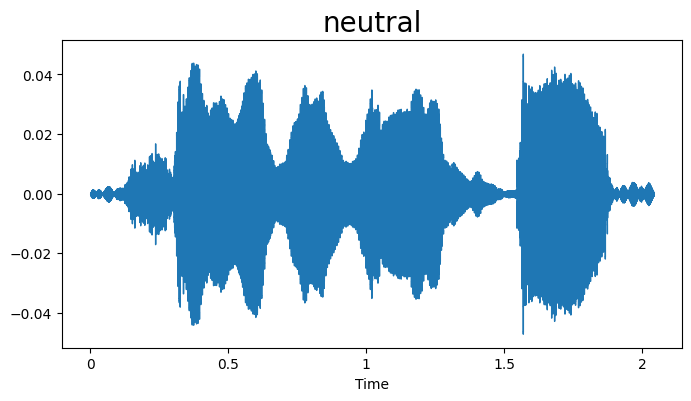

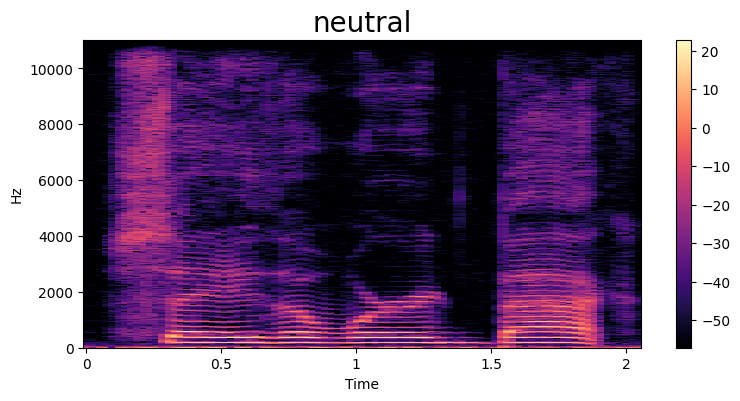

In [21]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

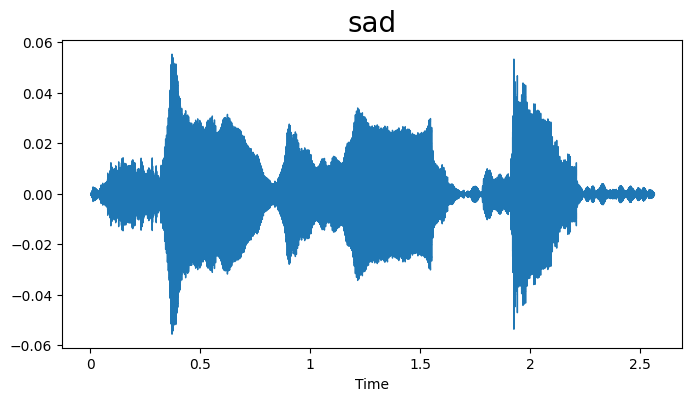

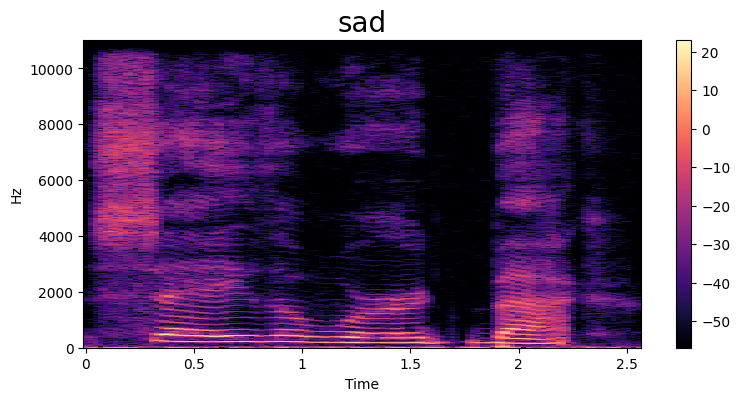

In [22]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

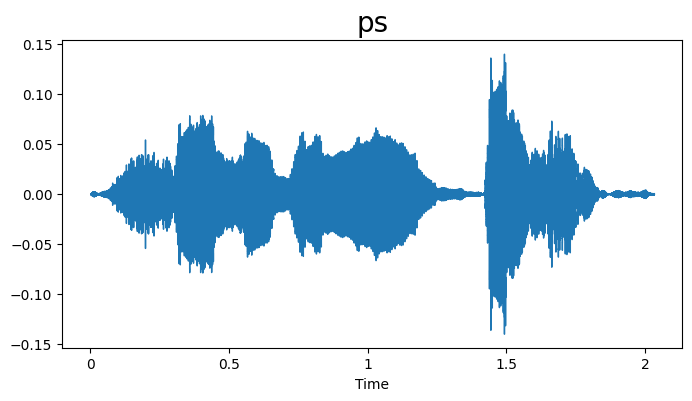

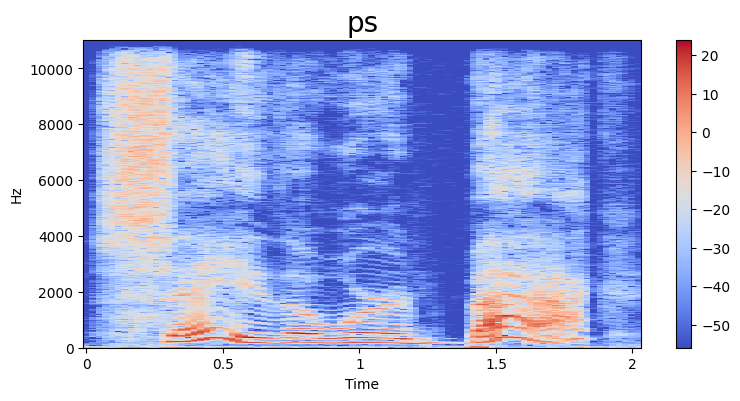

In [23]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

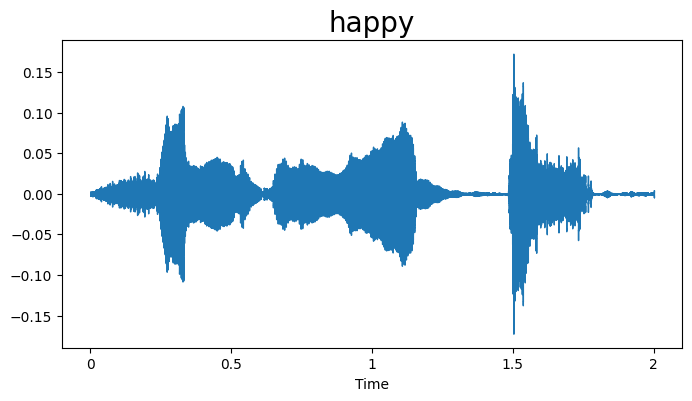

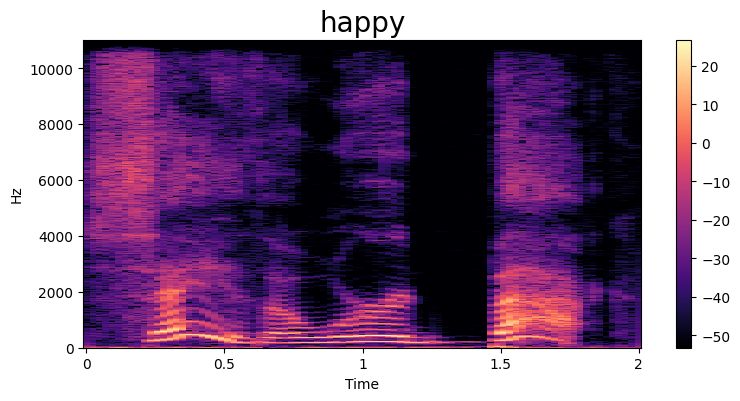

In [24]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [10]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [11]:
extract_mfcc(df['speech'][0])

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127560e+00,  1.0075363e+01, -2.0366707e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736625e-01, -1.8325533e+00,  2.0210145e-01,
        7.2755075e-01,  1.3177377e+00,  2.8863375e+00,  2.8557906e+00,
       -4.7129216e+00, -4.4365110e+00, -1.6211592e+00, -1.0239839e+01,
       -7.5512629e+00, -1.7968802e+00, -7.0376525e+00,  9.4365845e+00,
        8.3558550e+00,  2.1712360e+01,  1.9216991e+01,  2.0348930e+01,
        1.3413366e+01,  8.3391724e+00,  3.9472228e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548683e+00,  2.5099638e+00, -1.8239073e+00,
        4.8689618e+00,  9.3139238e+00,  2.0891502e+00, -1.9064914e+00],
      dtype=float32)

In [12]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [13]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560086, -32.74544, -...
2       [-429.79196, 46.12401, 1.5550478, -0.21709442,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.865501, 16.092945, 8....
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54756, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.373262, 39.577065, -...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [38]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [39]:
## input split
X = np.expand_dims(X, -1)
X[10]

array([[-3.8696872e+02],
       [ 7.9296356e+01],
       [-6.5276346e+00],
       [-3.1629627e+01],
       [-1.3537388e+01],
       [ 1.1204991e-01],
       [-9.9627275e+00],
       [ 4.5368900e+00],
       [-1.6995476e+01],
       [-3.1070420e-01],
       [-1.1768478e+01],
       [ 7.7235107e+00],
       [-4.3854594e+00],
       [ 5.3959851e+00],
       [-4.1637831e+00],
       [ 1.0115174e+00],
       [-4.7847652e+00],
       [-8.0087194e+00],
       [-3.4963491e+00],
       [-1.4018987e+01],
       [-4.4585376e+00],
       [ 5.9893570e+00],
       [ 2.0287540e+00],
       [ 1.8101780e+01],
       [ 2.5740902e+01],
       [ 3.0316135e+01],
       [ 1.7706594e+01],
       [ 1.5015854e+01],
       [ 4.5175390e+00],
       [ 8.7191486e+00],
       [ 7.7533264e+00],
       [ 1.1210857e+01],
       [ 7.2594442e+00],
       [-4.6222925e-01],
       [ 1.5548067e+00],
       [ 3.0831172e+00],
       [ 5.7517648e+00],
       [ 3.2036314e+00],
       [-4.9405236e+00],
       [ 4.8484855e+00]],

In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [22]:
y = y.toarray()

In [24]:
y[700]

array([0., 0., 0., 1., 0., 0., 0.])

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.3938 - loss: 1.5086 - val_accuracy: 0.3875 - val_loss: 1.9455
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.8082 - loss: 0.5239 - val_accuracy: 0.4393 - val_loss: 2.0911
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9132 - loss: 0.2770 - val_accuracy: 0.6464 - val_loss: 1.7460
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9198 - loss: 0.2235 - val_accuracy: 0.6500 - val_loss: 1.7533
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9590 - loss: 0.1324 - val_accuracy: 0.3554 - val_loss: 2.7520
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9289 - loss: 0.2418 - val_accuracy: 0.6036 - val_loss: 1.4891
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.9717 - loss: 0.1082 - val_accuracy: 0.5929 - val_loss: 1.6639
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9704 - loss: 0.0830 - val_accuracy: 0.7232 - v

In [40]:
model.save("ser_model.keras")
# Define the emotion classes
EMOTION_CLASSES = ['Happy', 'Sad', 'Angry', 'Fear', 'Pleasant Surprise', 'Neutral', 'Disgust']

# Select the sample and reshape it for prediction
sample = X[10]  # Get the 10th sample
sample = np.expand_dims(sample, axis=0)  # Reshape to (1, 40, 1)

# Make the prediction
prediction = model.predict(sample)  # Output shape will be (1, 7)

# Get the predicted class index and emotion
predicted_class = np.argmax(prediction)  # Index of the max probability
predicted_emotion = EMOTION_CLASSES[predicted_class]

# Print the result
print("Predicted Emotion:", predicted_emotion)


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

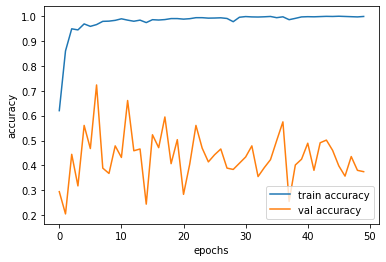

In [103]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

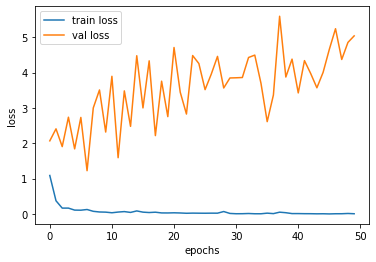

In [104]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()